In [1]:
import sys

sys.path.append('/home/alta/Conversational/OET/al826/2022/conv_frameworks/parallel_exp')

In [ ]:
from types import SimpleNamespace

from src.eval.eval_handler import EvalHandler
from src.config import config

In [3]:
E = EvalHandler('temp')

In [4]:
train_curves = E.dir.get_curve('train')
dev_curves = E.dir.get_curve('dev')

In [5]:
import numpy as np

def moving_average(x, n=10) :
    ret = np.cumsum(x, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
    
epochs, loss, accuracy = train_curves

epochs = [int(i) for i in epochs]
loss_smooth = moving_average(loss)
acc_smooth  = moving_average(accuracy)


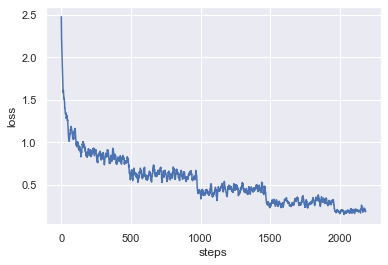

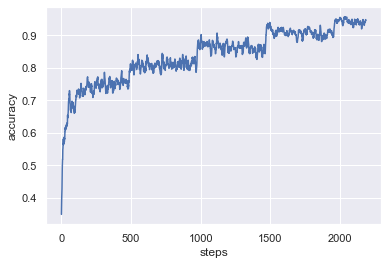

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
plt.plot(loss_smooth)
plt.xlabel('steps')
plt.ylabel('loss')
plt.show()

plt.plot(acc_smooth)
plt.xlabel('steps')
plt.ylabel('accuracy')
plt.show()


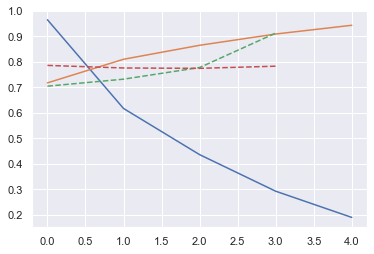

In [11]:
mean = lambda x: sum(x)/len(x)
def epoch_curves_train(epochs, loss, acc):
    epochs = [int(i) for i in epochs]

    num_epochs = epochs[-1]
    losses = []
    accs = []
    for i in range(num_epochs+1):
        e_loss = mean([ls for ep, ls in zip(epochs, loss) if ep == i])
        e_acc  = mean([ac for ep, ac in zip(epochs, acc) if ep == i])
        losses.append(e_loss)
        accs.append(e_acc)
    return losses, accs

def epoch_curves(train_curves, dev_curves):
    epochs, dev_losses, dev_accs = dev_curves
    epochs = [int(i) for i in epochs]

    tr_losses, tr_accs = epoch_curves_train(*train_curves)
    
    plt.plot(tr_losses)
    plt.plot(tr_accs)

    plt.plot(dev_losses, '--')
    plt.plot(dev_accs, '--')

epoch_curves(train_curves, dev_curves)